2023-10-23 21:33:53.280313: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-23 21:33:53.307603: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 21:33:53.397182: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 21:33:53.397240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 21:33:53.397263: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Model Loaded


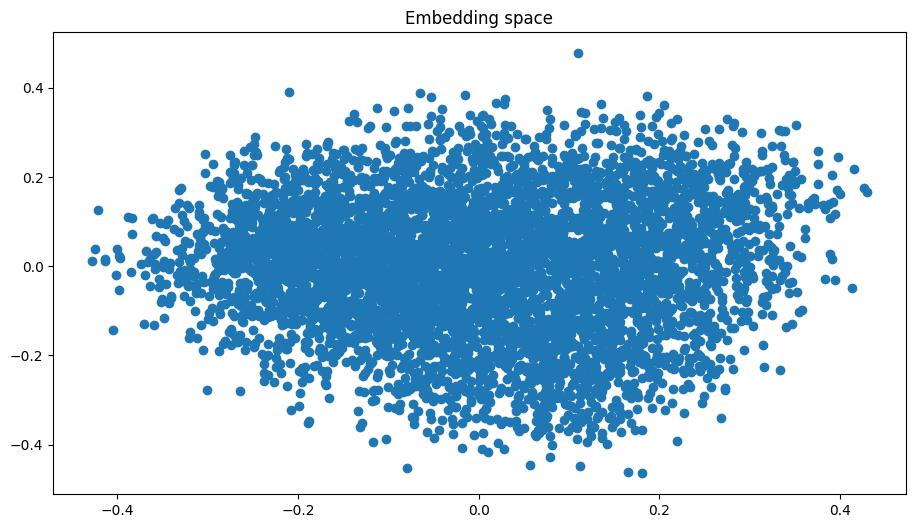

NearestNeighbors(n_neighbors=10)

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

def embed(texts):
    return model(texts)

df = pd.read_csv("Top_10000_Movies.csv", engine="python")
df = df[["original_title", "overview"]]
df = df.dropna()
df = df.reset_index()
df = df[:5500]

titles = list(df['overview'])
embeddings = embed(titles)

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)


In [3]:
def recommend(movie1, movie2):
    emb1 = embed([movie1])
    emb2 = embed([movie2])
    neighbors1 = nn.kneighbors(emb1, return_distance=False)[0]
    neighbors2 = nn.kneighbors(emb2, return_distance=False)[0]
    recommendations1 = df['original_title'].iloc[neighbors1].tolist()
    recommendations2 = df['original_title'].iloc[neighbors2].tolist()
    combined_recommendations = recommendations1 + recommendations2
    return combined_recommendations

movie1 = "Ghost Rider"
movie2 = "Titanic"
combined_recommendations = recommend(movie1, movie2)

print('Recommended Movies for', movie1, 'and', movie2, ':', combined_recommendations)


Recommended Movies for Ghost Rider and Titanic : ['Ghost Rider: Spirit of Vengeance', 'Ghost Rider', 'Dead Again in Tombstone', 'アイアンマン：ライズ・オブ・テクノヴォア', 'Shazam! Fury of the Gods', 'Fantastic Four: Rise of the Silver Surfer', 'The Scorpion King 3: Battle for Redemption', 'Thor: Love and Thunder', 'Ben 10 Alien Swarm', 'Megamind', 'Titanic', 'Titanic II', 'Titanic: 100 Years On', 'Romeo + Juliet', 'Los 7 pecados capitales', 'The Vow', 'Dear John', 'Јужни Ветар 2: Убрзање', "Pirates of the Caribbean: At World's End", 'Barbie & Chelsea: The Lost Birthday']
